<a href="https://colab.research.google.com/github/IamAlaric1999/Ipynb-First-assignment/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load and Prepare Data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Logistic Regression Without PCA
print("--- Logistic Regression WITHOUT PCA ---")
start_time_no_pca = time.time()
logisticRegr_no_pca = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logisticRegr_no_pca.fit(X_train_scaled, y_train)
end_time_no_pca = time.time()
time_no_pca = end_time_no_pca - start_time_no_pca

predictions_no_pca = logisticRegr_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, predictions_no_pca)

print(f"Training Time (without PCA): {time_no_pca:.4f} seconds")
print(f"Accuracy Score (without PCA): {accuracy_no_pca:.4f}")

# 3. Logistic Regression With PCA
print("\n--- Logistic Regression WITH PCA ---")
# Apply PCA (0.95 variance explained)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of features after PCA: {X_train_pca.shape[1]}")

start_time_pca = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logisticRegr_pca.fit(X_train_pca, y_train)
end_time_pca = time.time()
time_pca = end_time_pca - start_time_pca

predictions_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, predictions_pca)

print(f"Training Time (with PCA): {time_pca:.4f} seconds")
print(f"Accuracy Score (with PCA): {accuracy_pca:.4f}")

# 4. Comparison
print("\n--- Comparison ---")
print(f"Time difference (No PCA - PCA): {time_no_pca - time_pca:.4f} seconds")
print(f"Accuracy difference (PCA - No PCA): {accuracy_pca - accuracy_no_pca:.4f}")

--- Logistic Regression WITHOUT PCA ---
Training Time (without PCA): 69.5093 seconds
Accuracy Score (without PCA): 0.9154

--- Logistic Regression WITH PCA ---
Number of features after PCA: 330
Training Time (with PCA): 54.0378 seconds
Accuracy Score (with PCA): 0.9220

--- Comparison ---
Time difference (No PCA - PCA): 15.4714 seconds
Accuracy difference (PCA - No PCA): 0.0066


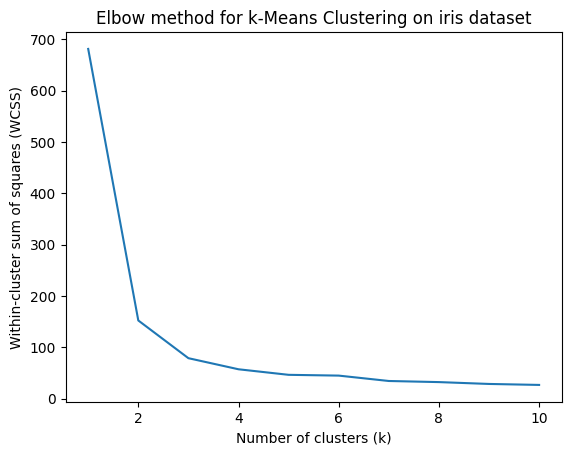

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Create a list of k values to try
k_values = range(1, 11)

# Calculate the within-cluster sum of squares (WCSS) for each k value
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs k values
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow method for k-Means Clustering on iris dataset')
plt.show()